<a href="https://colab.research.google.com/github/Interativa-TI/pharmusmc-adm-sample/blob/main/Dashboard_envio_sngpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pharmus MC
##Exemplo de análise
* Importação da planilha **dashboard_clientes.xlsx**
* Análise da métrica Data de envio de arquivo de movimentação ao SNGPC

#Preparando o ambiente

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from datetime import date

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns

In [6]:
from string import ascii_letters
import matplotlib.pyplot as plt

In [7]:
sns.set_style("whitegrid")

#Importando e tratando os dados da planilha

Importa a planilha e separa as lojas em 3 grupos:

*   Em dia
*   Atrasados
*   Inativos



In [8]:
dados = pd.read_excel('dashboard_clientes.xlsx', index_col=None, header=None, skiprows=1, dtype={0: str, 1: str, 2: str})

In [9]:
envio_sngpc = dados[[0, 12]]

In [10]:
envio_sngpc.columns = ['cnpj', 'data_envio']

In [11]:
envio_sngpc['data_envio'] = pd.to_datetime(envio_sngpc['data_envio'])

In [12]:
inativos = envio_sngpc.loc[(envio_sngpc['data_envio'] < '1970-01-01')]

In [13]:
envio_sngpc["inativo"] = envio_sngpc['data_envio'] < '1970-01-01'

In [14]:
envio_sngpc['hoje'] = date.today()

In [15]:
envio_sngpc['hoje'] = pd.to_datetime(envio_sngpc['hoje'])

In [16]:
envio_sngpc['dias'] = envio_sngpc['hoje'] - envio_sngpc['data_envio']

In [17]:
envio_sngpc['diasdiff'] = (envio_sngpc['dias'] / np.timedelta64(1,'D')).astype(int)

In [18]:
atrasados = envio_sngpc.query('inativo == False').query('diasdiff > 7')

In [19]:
em_dia = envio_sngpc.query('inativo == False').query('diasdiff <= 7')

#Resumo

### Dispersão das lojas com envio do arquivo dentro do prazo de 7 dias

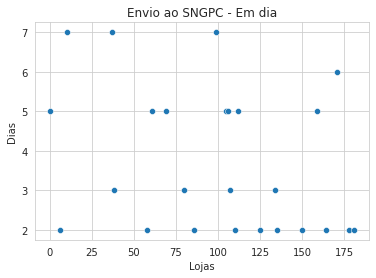

In [20]:
plt.xlabel('Lojas')
plt.ylabel('Dias')
plt.title('Envio ao SNGPC - Em dia')
sns.scatterplot(data = em_dia["diasdiff"])
plt.show()

### Dispersão das lojas com envio do arquivo atrasadas

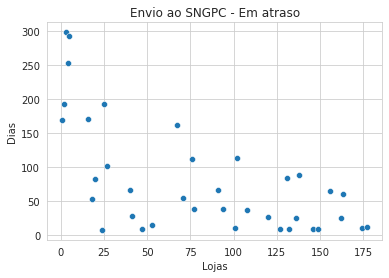

In [21]:
plt.xlabel('Lojas')
plt.ylabel('Dias')
plt.title('Envio ao SNGPC - Em atraso')
sns.scatterplot(data = atrasados["diasdiff"])
plt.show()

### Visão Geral

In [22]:
resumo = np.array([['Em dia', em_dia['data_envio'].count()],
   ['Atrasados', atrasados['data_envio'].count()],
   ['Inativos', inativos['data_envio'].count()]])

In [23]:
dfresumo = pd.DataFrame(resumo, index=range(100,103),columns=['Status', 'Quantidade'])

In [24]:
dfresumo

,Status,Quantidade
100,Em dia,25
101,Atrasados,37
102,Inativos,124


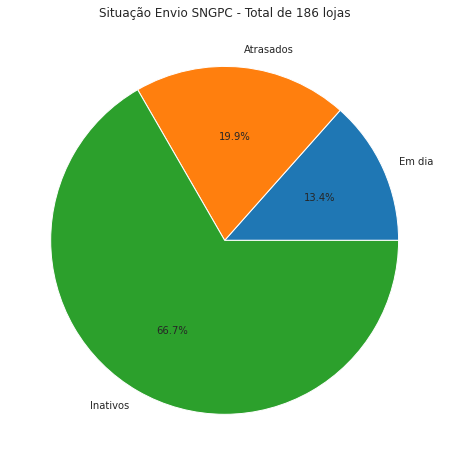

In [25]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(x = dfresumo['Quantidade'], labels = dfresumo['Status'], autopct='%1.1f%%')
ax1.set_title('Situação Envio SNGPC - Total de {lojas} lojas'.format(lojas=envio_sngpc['data_envio'].count()))
plt.show()

##Exportando os grupos de lojas em planilhas

In [26]:
em_dia.to_excel('sngpc_lojas_em_dia.xlsx')

In [27]:
atrasados.to_excel('sngpc_lojas_atrasados.xlsx')

In [28]:
inativos.to_excel('sngpc_lojas_inativas.xlsx')